# Helpfulness Prediction With Random Forest
## Data Science and Big Data Analytics Project

---

### Authors: 
- **Andrea Alberti** ([GitHub](https://github.com/AndreaAlberti07))
- **Davide Ligari** ([GitHub](https://github.com/DavideLigari01))
- **Cristian Andreoli** ([GitHub](https://github.com/CristianAndreoli94))

### Date: September 2023

---

## Data: 
The chosen dataset is [Amazon Books Reviews](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews).


## Goal:
Build a model able to predict the helpfulness of a review based on its content. 

---

In [1]:
import numpy as np
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the training and test data
train_data = np.load(
    '_gitignore/train_data_wv2_30_5.npz', allow_pickle=True)
test_data = np.load(
    '_gitignore/test_data_w2v_30_5.npz', allow_pickle=True)
X_train_embedding = train_data['x']
Y_train = train_data['y']
X_test_embedding = test_data['x']
Y_test = test_data['y']

print('Train set shape :', X_train_embedding.shape,
      'Test set shape: ', X_test_embedding.shape)

Train set shape : (151567, 30) Test set shape:  (37892, 30)


In [11]:

hidden_layers = (64, 64, 64,64)


mlp_model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation='relu',
                         alpha=0.01, learning_rate='adaptive', max_iter=1000000)

mlp_model.fit(X_train_embedding, Y_train)
joblib.dump(mlp_model,
            f'trained/MLP_v2.gz', compress=('gzip', 3))


# Make predictions using the trained model
Y_pred = mlp_model.predict(X_test_embedding)


print("Test MSE: ", mean_squared_error(Y_test, Y_pred))
print("Test R2: ", r2_score(Y_test, Y_pred))

Test MSE:  0.028207937449183495
Test R2:  0.1858447659084207


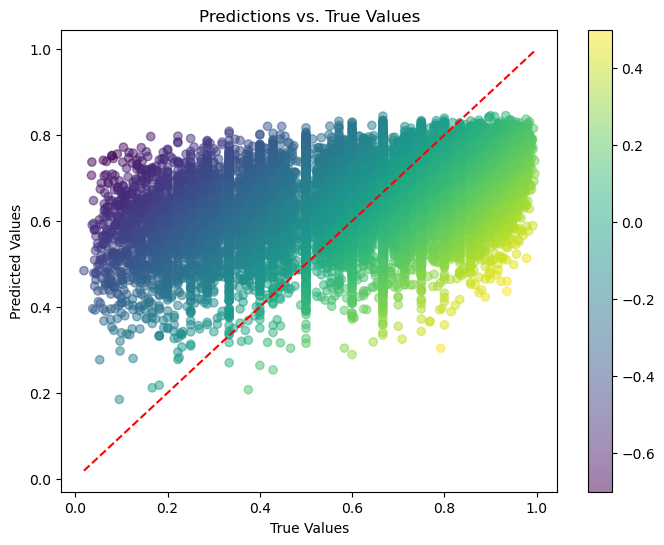

In [10]:

Y_pred = mlp_model.predict(X_test_embedding)
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, c=residuals, alpha=0.5, cmap='viridis')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. True Values')

plt.plot([min(Y_test), max(Y_test)], [min(Y_test),
         max(Y_test)], color='red', linestyle='--')
plt.colorbar()
# Show the plot
plt.show()